<h2>Problem Statement:</h2>

Through the analysis and modeling of the Ames, Iowa dataset of 2006 - 2010 home sales, can a best mix of features be constructed to predict the sale price of homes in a given market? 

<h1>Exploratory Data Analysis & Visualization<h1>

<h2>Import Packages<h2>

In [2]:
#basic DS packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#for Jupyter notebook:
%matplotlib inline

<h2>Import Data into DataFrame<h2>

In [172]:
df = pd.read_csv('./datasets/aimes_kaggle_df_for_visualization.csv')
outside_df = pd.read_csv('./datasets/outside_with_price.csv')

In [173]:
#Remove the max column setting in pandas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h2>Explore the Data</h2>

In [174]:
df.shape

(2051, 80)

In [175]:
#2051 rows and 81 columns of data

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,None,None,0,3,2010,WD,138500


## View Sale Price Outliers

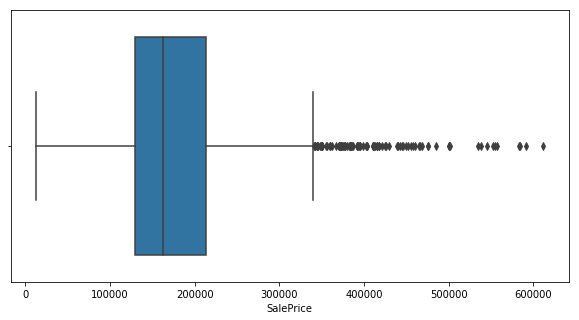

In [165]:
plt.figure(figsize = (10,5))

sns.boxplot(df['SalePrice'])

# Lot Area

In [166]:
df.groupby('Neighborhood')['Lot Area'].agg(['mean','median','max']).sort_values('mean', ascending = False).head()

,mean,median,max
Neighborhood,,,
ClearCr,28538.148148,15593.0,159000
Veenker,16171.352941,14330.0,50271
Timber,13066.041667,11506.0,57200
NoRidge,12406.125000,11013.5,46589
StoneBr,11892.947368,8103.5,53504


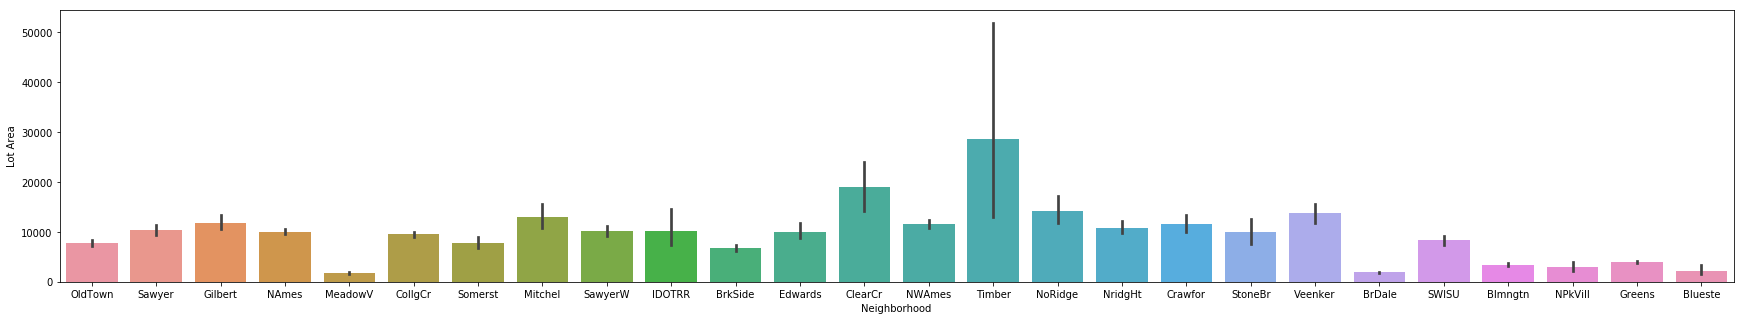

In [177]:
#Clear Creek has the highest mean Lot Area

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='Lot Area', data=outside_df);

In [176]:
outside_df.groupby('Neighborhood')['Lot Area'].agg(['mean','median','max']).sort_values('mean', ascending = False).head()

,mean,median,max
Neighborhood,,,
Timber,28568.541667,13028.5,215245
ClearCr,18972.294118,15584.0,45600
NoRidge,14164.000000,11787.0,35760
Veenker,13808.571429,14694.0,17542
Mitchel,12974.843750,10621.0,33983


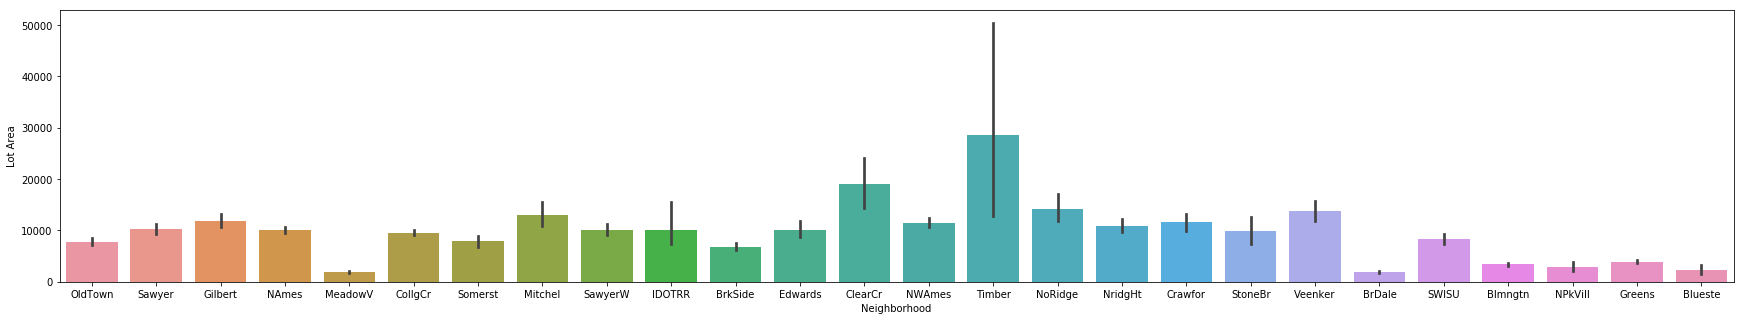

In [178]:
#Clear Creek has the highest mean Lot Area

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='Lot Area', data=outside_df);

# Overall Quality

In [168]:
df.groupby('Neighborhood')['Overall Qual'].agg(['mean','median','max']).sort_values('mean', ascending = False).head()

,mean,median,max
Neighborhood,,,
StoneBr,8.447368,8,10
NridgHt,8.278689,8,10
Greens,8.000000,8,8
NoRidge,7.875000,8,10
Somerst,7.430769,7,10


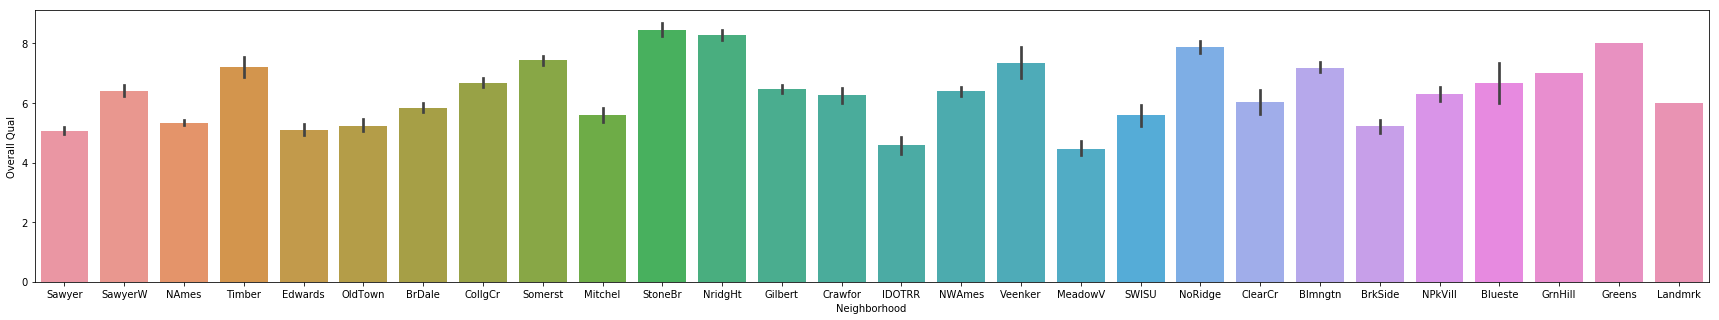

In [169]:
plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='Overall Qual', data=df);

# Price

In [170]:
df.groupby('Neighborhood')['SalePrice'].agg(['mean','median','min']).sort_values('mean', ascending = False).head(10)

,mean,median,min
Neighborhood,,,
StoneBr,329675.736842,322450,130000
NridgHt,322831.352459,317500,154000
NoRidge,316294.125000,300750,190000
GrnHill,280000.000000,280000,230000
Veenker,253570.588235,260000,150000
Timber,241051.354167,220000,137500
Somerst,227183.900000,224000,144152
ClearCr,217490.074074,225000,130000
Crawfor,205901.211268,199500,90350


In [189]:
outside_df.groupby('Neighborhood')['SalePrice'].agg(['mean','median','min']).sort_values('mean', ascending = False).head(10)

,mean,median,min
Neighborhood,,,
NoRidge,332158.886917,289917.302723,230579.399492
NridgHt,315452.333920,306055.893042,178389.052451
StoneBr,288421.305212,309880.064717,194792.838811
Timber,263207.274308,241268.883046,153609.802129
Veenker,235188.212666,211130.355738,170973.414420
Somerst,231514.296663,225320.002035,150486.456151
Crawfor,203111.833472,188302.788360,88159.650676
CollgCr,201226.313723,195918.474840,124785.774679
ClearCr,196329.748466,201483.914497,97155.112892


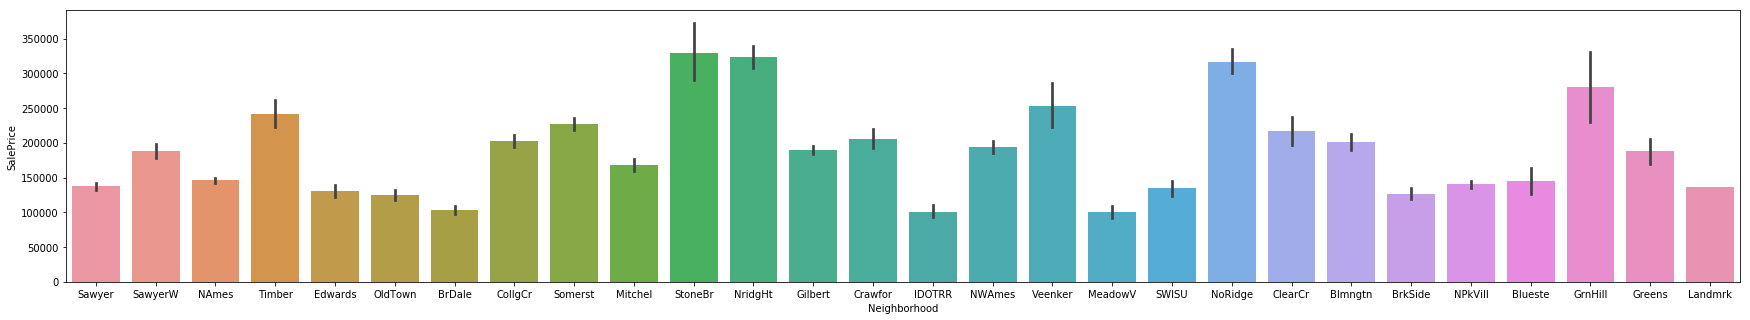

In [171]:
#Training Data

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='SalePrice', data=df);

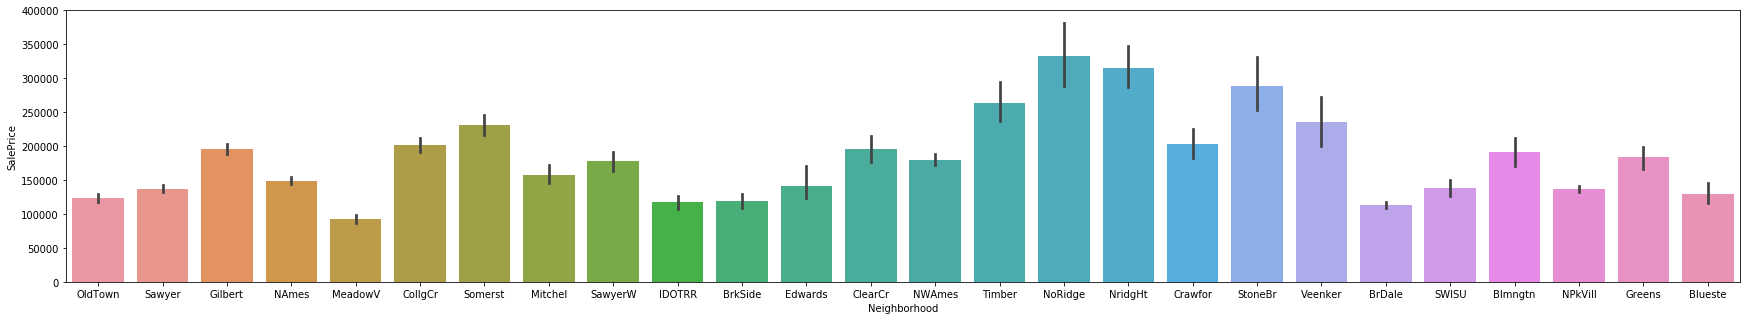

In [190]:
#Testing Data

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='SalePrice', data=outside_df);

# Condition

In [93]:
df.groupby('Neighborhood')['Overall Cond'].agg(['mean','median','min']).sort_values('mean', ascending = False).head(10)

,mean,median,min
Neighborhood,,,
Crawfor,6.380282,6.0,3
OldTown,6.257669,6.0,1
BrkSide,6.250000,6.5,2
NWAmes,5.965517,6.0,5
Sawyer,5.864865,6.0,2
Blueste,5.833333,6.0,5
NAmes,5.803226,6.0,3
Veenker,5.764706,5.0,3
SWISU,5.750000,6.0,3


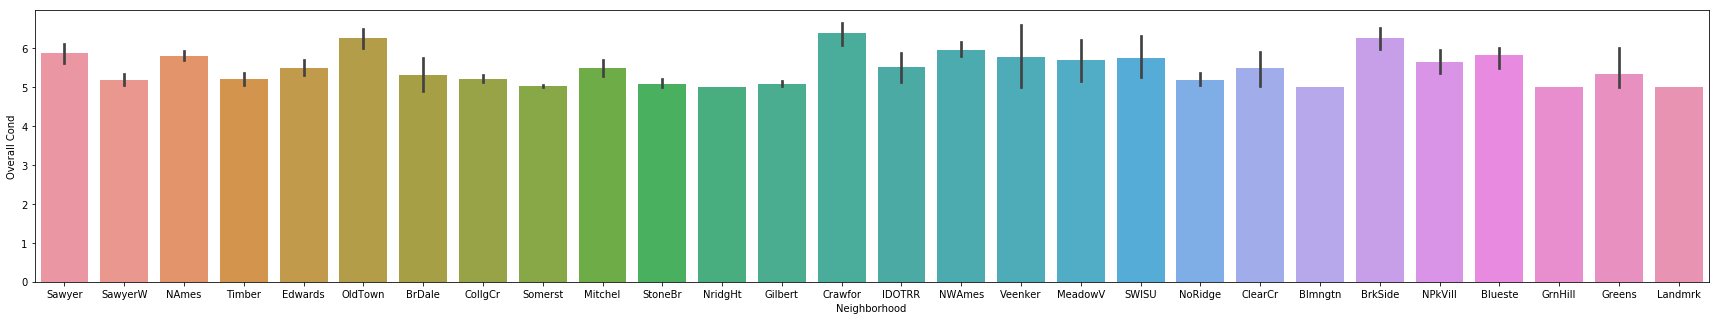

In [99]:
plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='Overall Cond', data=df);

In [179]:
outside_df.groupby('Neighborhood')['Overall Cond'].agg(['mean','median','min']).sort_values('mean', ascending = False).head(10)

,mean,median,min
Neighborhood,,,
Veenker,6.428571,6.0,5
OldTown,6.394737,6.5,1
Crawfor,6.125000,6.0,3
BrkSide,6.125000,6.0,3
IDOTRR,6.125000,6.0,1
NAmes,5.834586,6.0,3
Blueste,5.750000,6.0,5
NWAmes,5.704545,6.0,5
ClearCr,5.647059,5.0,3


# Year Built

In [96]:
df.groupby('Neighborhood')['Year Built'].agg(['mean','median','min','max']).sort_values('min', ascending = True).head(10)

,mean,median,min,max
Neighborhood,,,,
OldTown,1922.950920,1920.0,1872,2008
Sawyer,1962.936937,1965.0,1875,1984
SawyerW,1991.310345,1993.0,1880,2008
IDOTRR,1928.043478,1925.0,1895,1967
Edwards,1956.363636,1954.0,1900,2009
BrkSide,1933.144737,1932.5,1908,1970
Crawfor,1947.704225,1940.0,1910,2008
SWISU,1931.312500,1928.0,1911,2004
NAmes,1960.103226,1960.0,1920,2003


In [180]:
outside_df.groupby('Neighborhood')['Year Built'].agg(['mean','median','min','max']).sort_values('min', ascending = True).head(10)

,mean,median,min,max
Neighborhood,,,,
OldTown,1921.039474,1920.0,1880,1980
BrkSide,1930.500000,1926.0,1900,1950
Edwards,1958.549020,1956.0,1900,2009
IDOTRR,1926.625000,1925.0,1900,1963
SWISU,1928.625000,1927.5,1907,1967
ClearCr,1964.000000,1967.0,1908,1997
Crawfor,1944.687500,1939.5,1915,2006
NAmes,1959.345865,1959.0,1918,2001
SawyerW,1987.552632,1992.0,1920,2007


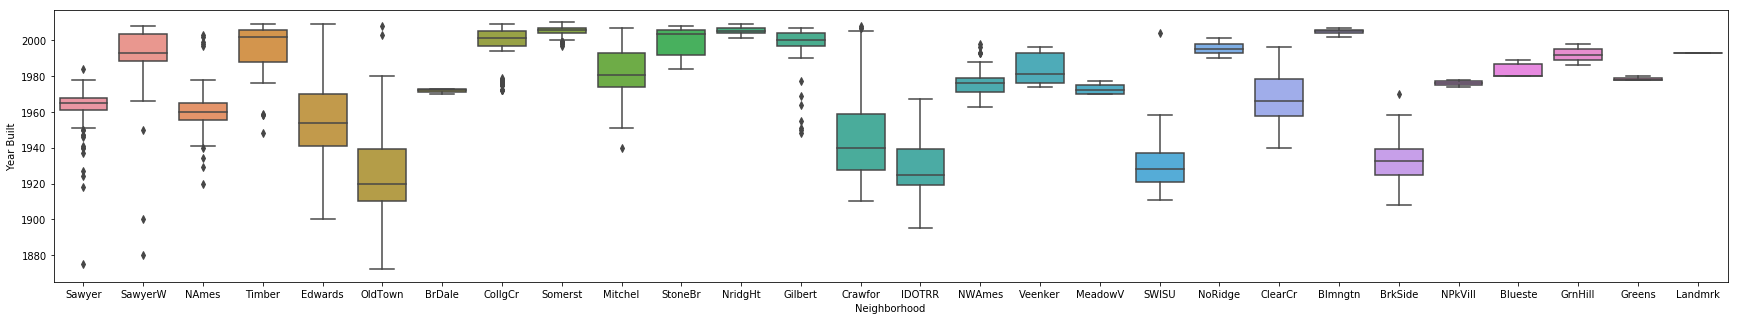

In [102]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Neighborhood', y='Year Built', data=df);

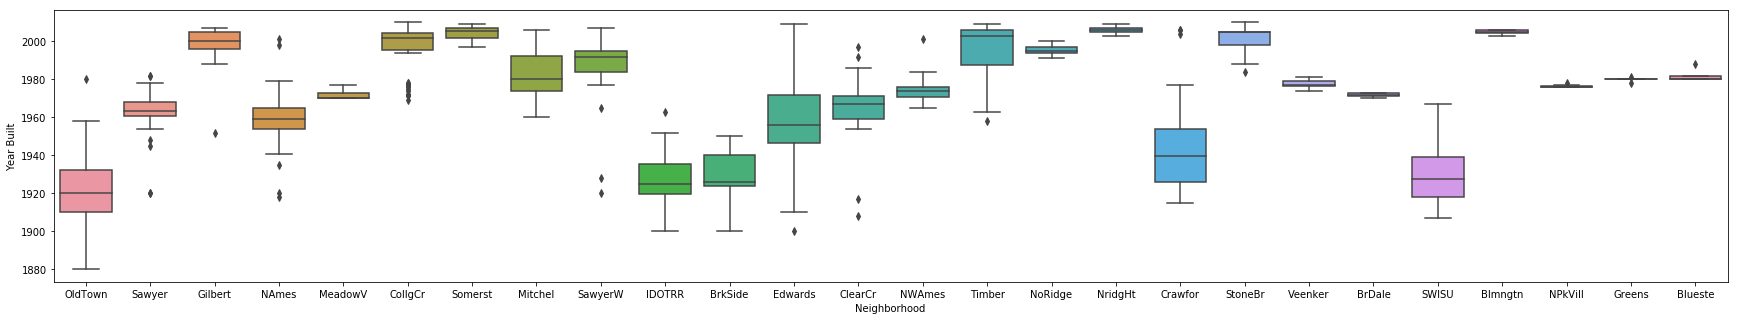

In [181]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Neighborhood', y='Year Built', data=outside_df);

## Year Built to Quality

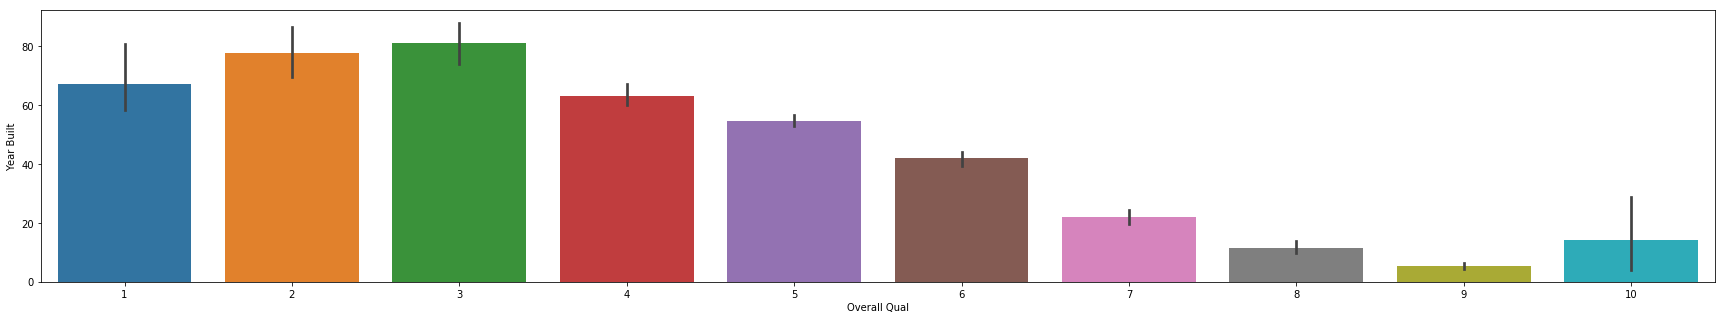

In [123]:
year_ago = 2010 - df['Year Built']
plt.figure(figsize=(30,5))
sns.barplot(x='Overall Qual', y=year_ago, data=df);

# Overall Quality to Sale Price

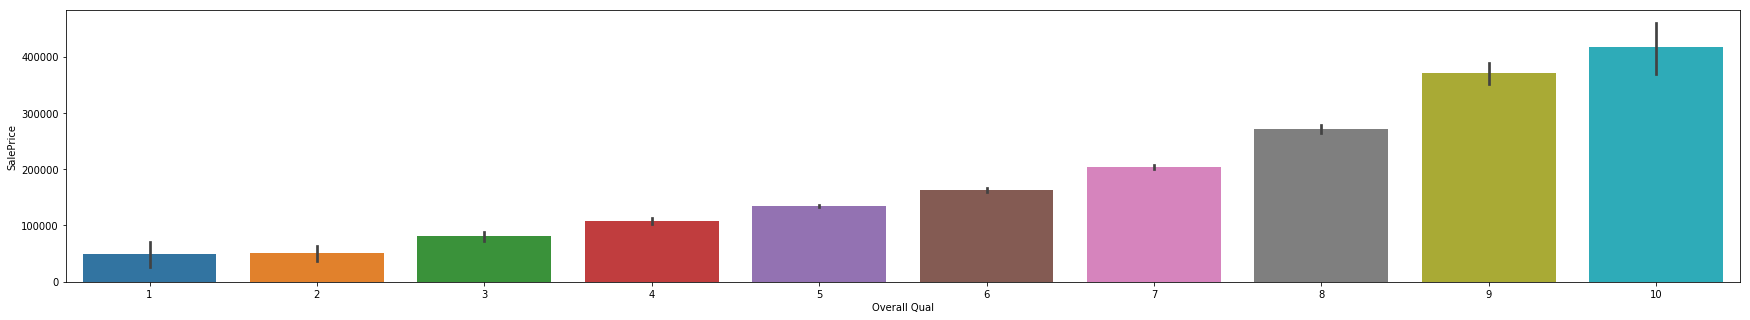

In [103]:
#Training Set

plt.figure(figsize=(30,5))
sns.barplot(x='Overall Qual', y='SalePrice', data=df);

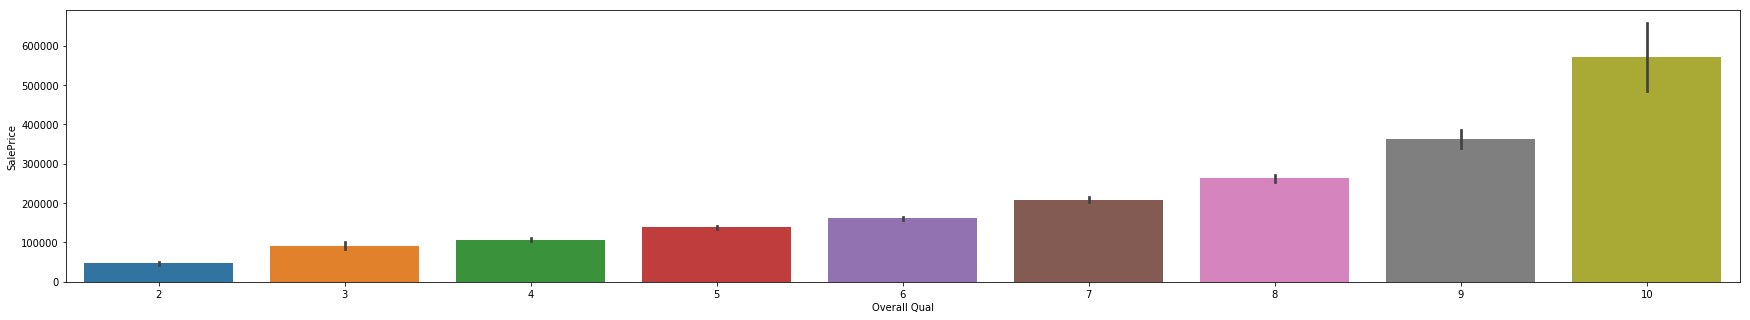

In [182]:
#Testing Set

plt.figure(figsize=(30,5))
sns.barplot(x='Overall Qual', y='SalePrice', data=outside_df);

# Above Ground Living Area to Sale Price

<Figure size 2160x360 with 0 Axes>

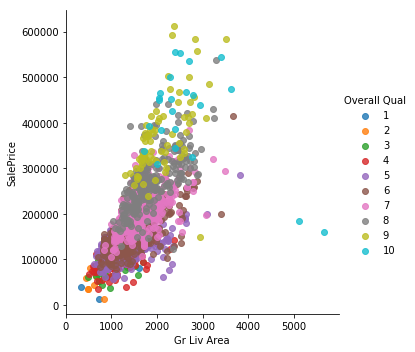

In [108]:
#Training Data

plt.figure(figsize=(30,5))
sns.lmplot(x='Gr Liv Area', y='SalePrice', hue ='Overall Qual', data=df, fit_reg = False);

<Figure size 2160x360 with 0 Axes>

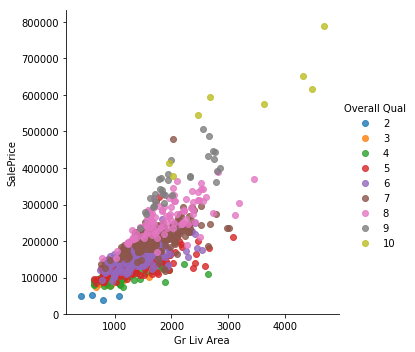

In [183]:
#Testing Data

plt.figure(figsize=(30,5))
sns.lmplot(x='Gr Liv Area', y='SalePrice', hue ='Overall Qual', data=outside_df, fit_reg = False);

# And Combined!

<Figure size 2160x360 with 0 Axes>

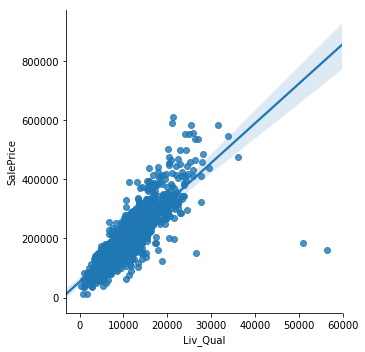

In [112]:
df['Liv_Qual'] = df['Overall Qual'] * df['Gr Liv Area']

plt.figure(figsize=(30,5))
sns.lmplot(x='Liv_Qual', y='SalePrice', data=df, fit_reg = True);

# Most Important Features for Quality!

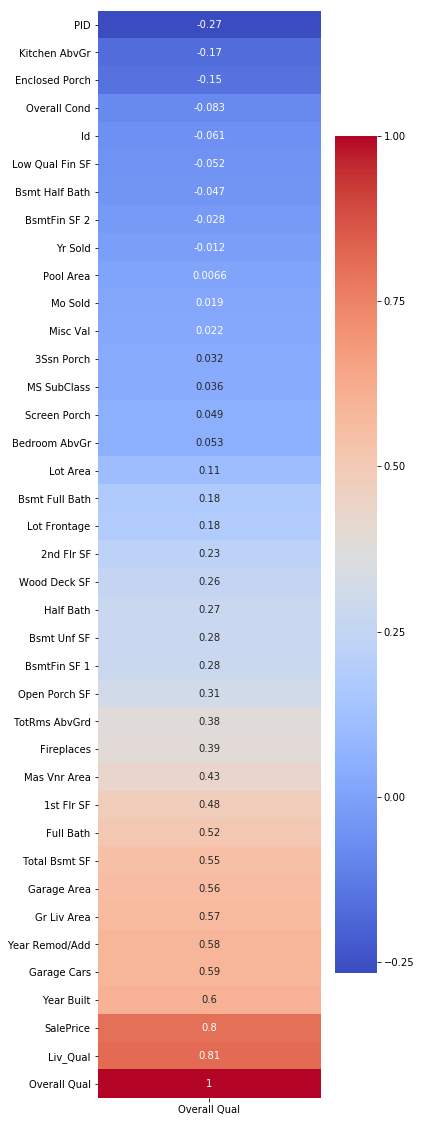

In [116]:
plt.figure(figsize = (5,20))

sns.heatmap(df.corr()[['Overall Qual']].sort_values('Overall Qual'), annot = True, cmap = 'coolwarm')

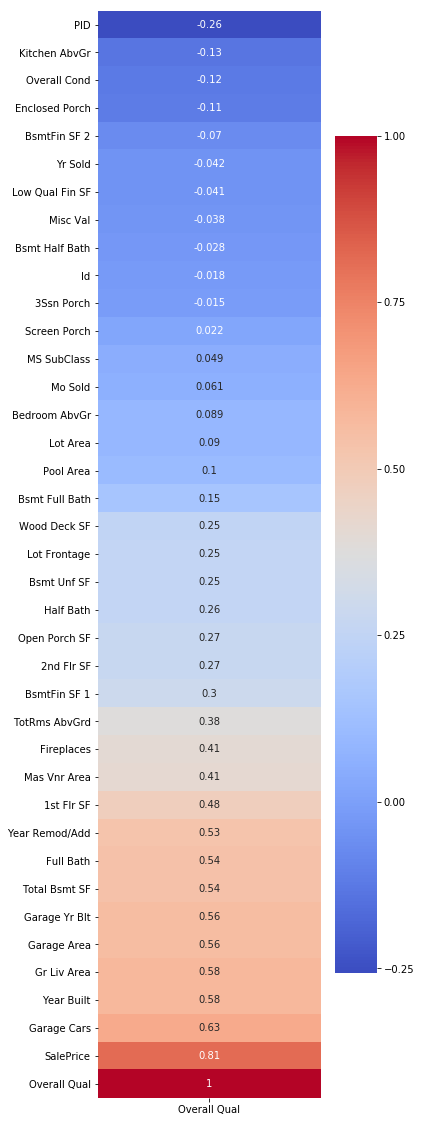

In [185]:
#Testing Data

plt.figure(figsize = (5,20))

sns.heatmap(outside_df.corr()[['Overall Qual']].sort_values('Overall Qual'), annot = True, cmap = 'coolwarm')

<Figure size 2160x360 with 0 Axes>

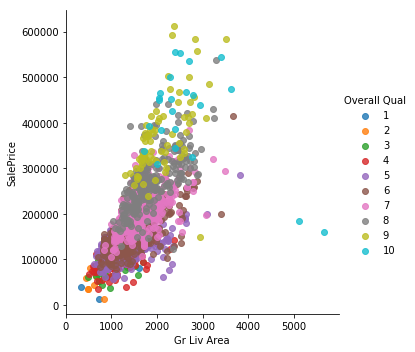

In [124]:
plt.figure(figsize=(30,5))
sns.lmplot(x='Gr Liv Area', y='SalePrice', hue ='Overall Qual', data=df, fit_reg = False);

# Only High Quality Homes!

In [194]:
high_qual = df[df['Overall Qual'] >= 9]

In [191]:
out_high_qual = outside_df[outside_df['Overall Qual'] >= 9]

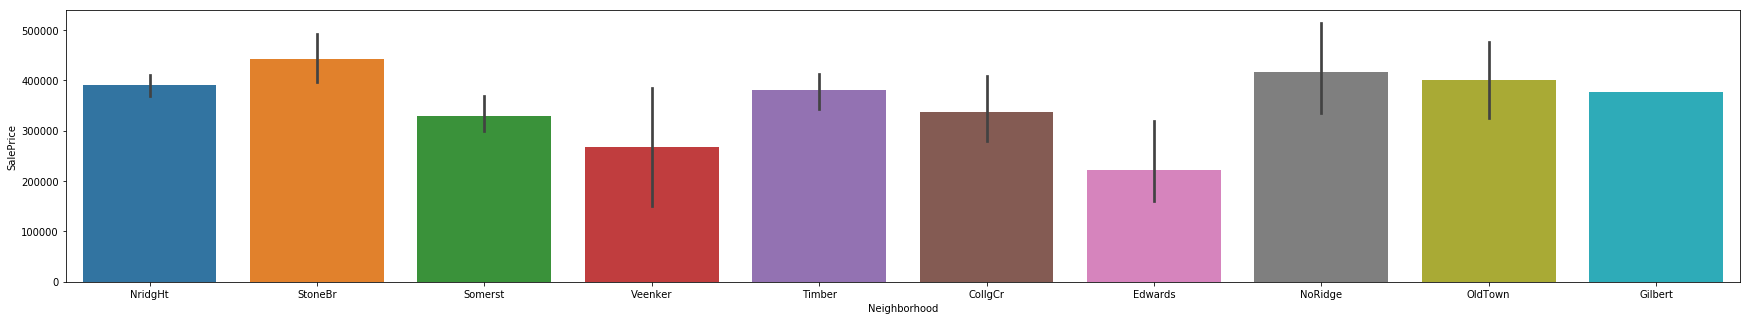

In [195]:
#Training Data

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='SalePrice', data=high_qual);

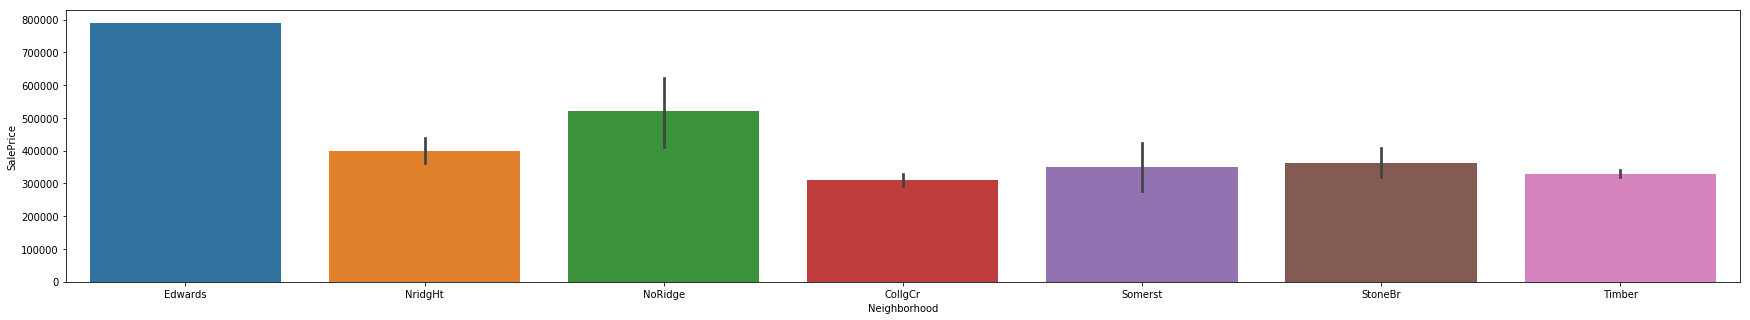

In [192]:
#Testing Data

plt.figure(figsize=(30,5))
sns.barplot(x='Neighborhood', y='SalePrice', data=out_high_qual);

In [188]:
high_qual['Neighborhood'].value_counts()

NridgHt    19
NoRidge     5
Somerst     4
StoneBr     4
Timber      3
CollgCr     2
Edwards     1
Name: Neighborhood, dtype: int64

In [196]:
out_high_qual['Neighborhood'].value_counts()

NridgHt    19
NoRidge     5
Somerst     4
StoneBr     4
Timber      3
CollgCr     2
Edwards     1
Name: Neighborhood, dtype: int64

In [147]:
#Low price high quality Homes.

high_qual.groupby('Neighborhood')['SalePrice'].agg(['mean','median','min','max']).sort_values('min', ascending = True).head(10)

,mean,median,min,max
Neighborhood,,,,
Veenker,267500.000000,267500,150000,385000
Edwards,221283.333333,183850,160000,320000
CollgCr,336550.166667,318131,239000,475000
Somerst,328191.000000,315000,264132,468000
NridgHt,389579.326923,375081,266000,611657
NoRidge,417033.600000,410000,291000,584500
Timber,380680.000000,392000,316500,425000
StoneBr,441504.642857,446890,319900,591587
OldTown,400000.000000,400000,325000,475000


In [143]:
#Mean sale price of a highest quality home

high_qual['SalePrice'].mean()

381053.19